In [1]:
import pickle

import humanize
import numpy as np
import pandas as pd
from datetime import datetime

%matplotlib inline
%load_ext autoreload

In [2]:
final_features = pd.read_csv('./final_features.csv', header=0, index_col=0)
outcomes = pd.read_csv('./labels.csv', header=None, index_col=0)[1]

In [3]:
col_names = np.append(final_features.columns.values, 'outcome')
col_names

array(['driver_age_raw', 'search_conducted', 'contraband_found', 'is_male',
       'violation_cell_phone', 'violation_display_of_plates',
       'violation_equipment', 'violation_incomplete_stop',
       'violation_license', 'violation_lights',
       'violation_moving_violation', 'violation_other',
       'violation_registration', 'violation_safe_movement',
       'violation_seatbelt', 'violation_speeding',
       'violation_suspended_license', 'violation_traffic_control_signal',
       'violation_window_tint', 'county_name_Fairfield County',
       'county_name_Hartford County', 'county_name_Litchfield County',
       'county_name_Middlesex County', 'county_name_New Haven County',
       'county_name_New London County', 'county_name_Tolland County',
       'county_name_Windham County', 'driver_race_Asian',
       'driver_race_Black', 'driver_race_Hispanic', 'driver_race_Other',
       'driver_race_White', 'stop_duration_1-15 min',
       'stop_duration_16-30 min', 'stop_duration_30+ 

In [4]:
final_features['outcomes'] = outcomes
final_features

,driver_age_raw,search_conducted,contraband_found,is_male,violation_cell_phone,violation_display_of_plates,violation_equipment,violation_incomplete_stop,violation_license,violation_lights,...,stop_duration_30+ min,day_period_Afternoon,day_period_Evening,day_period_Morning,day_period_Small Hours,season_Fall,season_Spring,season_Summer,season_Winter,outcomes
0,0.696970,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,1,0,0,0,Ticket
1,0.202020,0,0,1,0,0,0,0,0,0,...,0,0,0,0,1,1,0,0,0,Verbal Warning
2,0.343434,0,0,1,0,0,0,0,0,0,...,0,0,0,0,1,1,0,0,0,Ticket
3,0.464646,0,0,1,0,0,0,0,0,0,...,0,0,0,0,1,1,0,0,0,Written Warning
4,0.303030,0,0,1,0,0,0,0,0,0,...,0,0,0,0,1,1,0,0,0,Ticket
5,0.252525,0,0,1,0,0,0,0,0,1,...,0,0,0,0,1,1,0,0,0,Verbal Warning
6,0.272727,0,0,1,0,0,0,0,0,0,...,0,0,0,0,1,1,0,0,0,Ticket
7,0.484848,0,0,1,0,0,0,0,0,0,...,0,0,0,0,1,1,0,0,0,Verbal Warning
8,0.252525,0,0,1,0,0,0,0,0,0,...,0,0,0,0,1,1,0,0,0,Ticket
9,0.323232,0,0,1,0,0,0,0,0,0,...,0,0,0,0,1,1,0,0,0,Verbal Warning


In [5]:
final_features.shape

(313274, 44)

In [6]:
arrest = final_features.loc[final_features['outcomes'] == 'Arrest']
summons = final_features.loc[final_features['outcomes'] == 'Summons']
ww = final_features.loc[final_features['outcomes'] == 'Written Warning']
vw = final_features.loc[final_features['outcomes'] == 'Verbal Warning']

In [7]:
oversampled = final_features.append([arrest] * 30, ignore_index=True)
oversampled = oversampled.append([summons] * 17, ignore_index=True)
oversampled = oversampled.append([ww] * 7, ignore_index=True)
oversampled = oversampled.append([vw] * 4, ignore_index=True)
oversampled.shape

(1120284, 44)

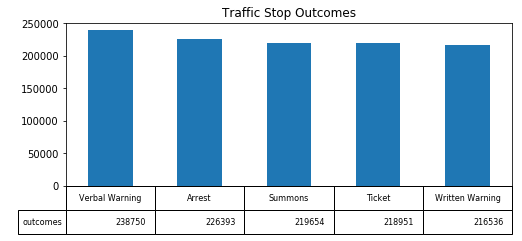

In [8]:
outcome_breakdown = oversampled['outcomes'].value_counts().plot.bar(figsize=(8, 3), title='Traffic Stop Outcomes', table=True)
outcome_breakdown.axes.get_xaxis().set_visible(False)
outcome_breakdown.tables[0].scale(1, 2)

In [9]:
oversampled_outcomes = oversampled.pop('outcomes')

In [10]:
oversampled_outcomes[:10]

0             Ticket
1     Verbal Warning
2             Ticket
3    Written Warning
4             Ticket
5     Verbal Warning
6             Ticket
7     Verbal Warning
8             Ticket
9     Verbal Warning
Name: outcomes, dtype: object

In [11]:
oversampled[:10]

,driver_age_raw,search_conducted,contraband_found,is_male,violation_cell_phone,violation_display_of_plates,violation_equipment,violation_incomplete_stop,violation_license,violation_lights,...,stop_duration_16-30 min,stop_duration_30+ min,day_period_Afternoon,day_period_Evening,day_period_Morning,day_period_Small Hours,season_Fall,season_Spring,season_Summer,season_Winter
0,0.696970,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,1,0,0,0
1,0.202020,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,1,1,0,0,0
2,0.343434,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,1,1,0,0,0
3,0.464646,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,1,1,0,0,0
4,0.303030,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,1,1,0,0,0
5,0.252525,0,0,1,0,0,0,0,0,1,...,0,0,0,0,0,1,1,0,0,0
6,0.272727,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,1,1,0,0,0
7,0.484848,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,1,1,0,0,0
8,0.252525,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,1,1,0,0,0
9,0.323232,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,1,1,0,0,0


In [12]:
from sklearn.cross_validation import train_test_split

# Split the 'features' and 'income' data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(oversampled, 
                                                    oversampled_outcomes, 
                                                    test_size=0.2, 
                                                    random_state=0)


/home/pato/anaconda2/envs/py36/lib/python3.6/site-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [13]:
import xgboost as xgb

In [14]:
codes = {
    'Ticket': 1,
    'Arrest': 2,
    'Summons': 3,
    'Verbal Warning': 4,
    'Written Warning': 5,
}

def labels_to_ints(label):
    return codes[label]

In [15]:
xg_train = xgb.DMatrix(X_train.values, label=y_train.apply(labels_to_ints).values)
xg_test = xgb.DMatrix(X_test.values, label=y_test.apply(labels_to_ints).values)

In [16]:
params = {
    'objective': 'multi:softmax',
#     'learning_rate': .03,
    'max_depth': 8,
    'silent': 1,
    'nthread': 6,
    'num_class': 43,
#     'predictor': 'gpu_predictor',
#     'max_bin': 512,
    'tree_method': 'gpu_hist',
#     'alpha': 0.8,
#     'gamma': 10.0,
    'subsample': 0.6,
#     'lambda': 0.9,,
#     'colsample_bytree': 0.9,
#     'colsample_bylevel': 0.3,
#     'scale_pos_weight': 0.1,
#     'updater': 'grow_histmaker,refresh,prune',
#     'grow_policy': 'lossguide',
#     'max_leaves': 20000,
#     'max_bin': 1024,
#     'base_score': 1.0,
#     'eval_metric': 'ndcg',
#     'max_delta_step': 8,
}

In [ ]:
watchlist = [(xg_train, 'train'), (xg_test, 'test')]
num_round = 10000
bst = xgb.train(params, xg_train, num_round, watchlist)
pred = bst.predict(xg_test)

In [ ]:
error_rate = np.sum(pred != y_test.apply(labels_to_ints)) / y_test.shape[0]
print('Test error using softmax = {}'.format(error_rate))

In [ ]:
from datetime import datetime

timestamp = datetime.now().strftime('%Y%m%d%H%M%S')
bst.save_model('xgb_model-saved-{}.model'.format(timestamp))
bst.dump_model('xgb_model_dumped-{}.txt'.format(timestamp))

In [ ]:
from sklearn.externals import joblib

joblib.dump(bst, "xgb_model_{}.joblib.dat".format(timestamp))


In [ ]:
bst.save_model('./xgb_model_test_001-saved.model')

In [ ]:
bst.dump_model('./xgb_model_test_001-dumped.txt')

In [ ]:
ax = xgb.plot_importance(bst)
fig = ax.figure
fig.set_size_inches(15, 10)

In [ ]:
print('f0:\t{}'.format(col_names[0]))
print('f3:\t{}'.format(col_names[3]))
print('f30:\t{}'.format(col_names[30]))


In [ ]:
xgb.plot_tree(bst, num_trees=2)

In [ ]:
xgb.to_graphviz(bst, num_trees=2)

In [ ]:
import pickle

In [ ]:
from datetime import datetime

pickle.dump(bst, open('./xgb_model_5k.pickle.{}.dat'.format(datetime.now().strftime('%Y%m%d%H%M%S')), 'wb'))

### Plot results

In [ ]:
error_results = {
    'train': [],
    'test': [],
}

with open('./xgboost-5k_run.log', 'r') as f:
    for line in f:
        tokens = line.strip().split('\t')
        error_results['train'].append(float(tokens[1].split(':')[1]))
        error_results['test'].append(float(tokens[2].split(':')[1]))

df_errors = pd.DataFrame(error_results)

In [ ]:
learning_curve = df_errors.plot.line(title='Learning curve', figsize=(8,5))
learning_curve.set_xlabel('Number of runs')
learning_curve.set_ylabel('Error')


# Load saved model and resume training

In [ ]:
# watchlist = [(xg_train, 'train'), (xg_test, 'test')]
# num_round = 1000

# loaded = pickle.load(open('./xgb_model_5k.pickle.dat', 'rb'))
# bst_continued = xgb.train(params, xg_train, num_round, watchlist, xgb_model=loaded)
# pred_continued = bst_continued.predict(xg_test)

In [17]:
from sklearn.externals import joblib

watchlist = [(xg_train, 'train'), (xg_test, 'test')]
# num_round = 5000
num_round = 50

# loaded = joblib.load("xgb_model_20180501083236.joblib.dat")
loaded = xgb.Booster({'nthread': 6})
loaded.load_model('xgb_model-saved-20180501083236.model')


In [18]:
bst_continued = xgb.train(params, xg_train, num_round, watchlist, xgb_model=loaded)

[0]	train-merror:0.146452	test-merror:0.183257
[1]	train-merror:0.146453	test-merror:0.183235
[2]	train-merror:0.146429	test-merror:0.183235
[3]	train-merror:0.146414	test-merror:0.183208
[4]	train-merror:0.146414	test-merror:0.183154
[5]	train-merror:0.146423	test-merror:0.183221
[6]	train-merror:0.146455	test-merror:0.183239
[7]	train-merror:0.146475	test-merror:0.183119
[8]	train-merror:0.146464	test-merror:0.183078
[9]	train-merror:0.146453	test-merror:0.182989
[10]	train-merror:0.146439	test-merror:0.182949
[11]	train-merror:0.146438	test-merror:0.182994
[12]	train-merror:0.146437	test-merror:0.182958
[13]	train-merror:0.146447	test-merror:0.183003
[14]	train-merror:0.146436	test-merror:0.182958
[15]	train-merror:0.14645	test-merror:0.183038
[16]	train-merror:0.146429	test-merror:0.182998
[17]	train-merror:0.146427	test-merror:0.182936
[18]	train-merror:0.146429	test-merror:0.183141
[19]	train-merror:0.146429	test-merror:0.183181
[20]	train-merror:0.146443	test-merror:0.183168
[21

In [19]:
pred_continued = loaded.predict(xg_test)

In [20]:
error_rate = np.sum(pred_continued != y_test.apply(labels_to_ints)) / y_test.shape[0]
print('Test error using softmax = {}'.format(error_rate))

Test error using softmax = 0.1832971074324837


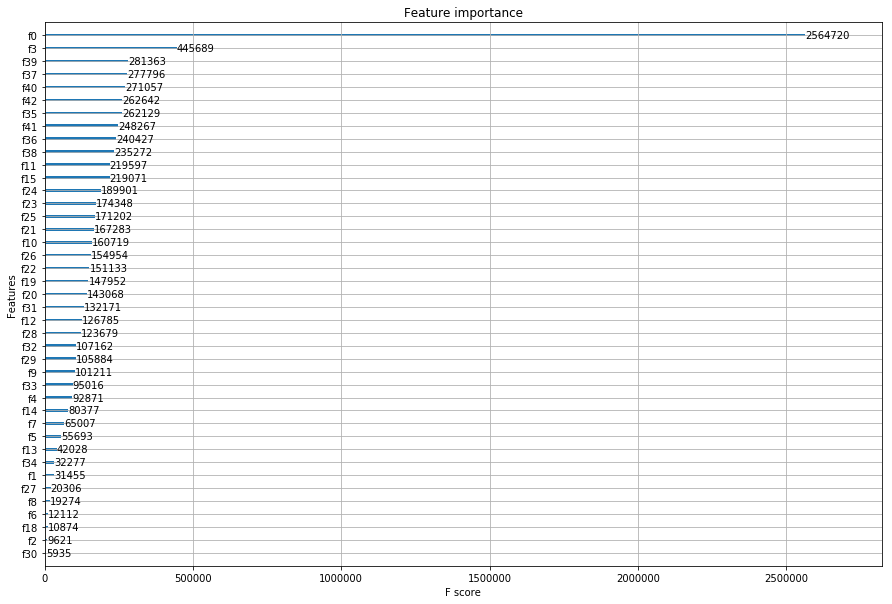

In [21]:
ax = xgb.plot_importance(loaded)
fig = ax.figure
fig.set_size_inches(15, 10)

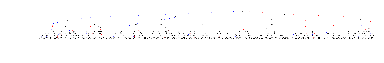

In [22]:
xgb.plot_tree(loaded, num_trees=2)

In [ ]:
xgb.to_graphviz(loaded, num_trees=8)

In [ ]:
from datetime import datetime

timestamp = datetime.now().strftime('%Y%m%d%H%M%S')
bst_continued.save_model('./xgb_model-saved-{}.model'.format(timestamp))
bst_continued.dump_model('./xgb_model_dumped-{}.txt'.format(timestamp))

In [24]:
X_train.isnull().sum()

driver_age_raw                      0
search_conducted                    0
contraband_found                    0
is_male                             0
violation_cell_phone                0
violation_display_of_plates         0
violation_equipment                 0
violation_incomplete_stop           0
violation_license                   0
violation_lights                    0
violation_moving_violation          0
violation_other                     0
violation_registration              0
violation_safe_movement             0
violation_seatbelt                  0
violation_speeding                  0
violation_suspended_license         0
violation_traffic_control_signal    0
violation_window_tint               0
county_name_Fairfield County        0
county_name_Hartford County         0
county_name_Litchfield County       0
county_name_Middlesex County        0
county_name_New Haven County        0
county_name_New London County       0
county_name_Tolland County          0
county_name_

In [28]:
col_names[30]

'driver_race_Other'

In [27]:
loaded.get_score()

{'f0': 2564720,
 'f1': 31455,
 'f10': 160719,
 'f11': 219597,
 'f12': 126785,
 'f13': 42028,
 'f14': 80377,
 'f15': 219071,
 'f18': 10874,
 'f19': 147952,
 'f2': 9621,
 'f20': 143068,
 'f21': 167283,
 'f22': 151133,
 'f23': 174348,
 'f24': 189901,
 'f25': 171202,
 'f26': 154954,
 'f27': 20306,
 'f28': 123679,
 'f29': 105884,
 'f3': 445689,
 'f30': 5935,
 'f31': 132171,
 'f32': 107162,
 'f33': 95016,
 'f34': 32277,
 'f35': 262129,
 'f36': 240427,
 'f37': 277796,
 'f38': 235272,
 'f39': 281363,
 'f4': 92871,
 'f40': 271057,
 'f41': 248267,
 'f42': 262642,
 'f5': 55693,
 'f6': 12112,
 'f7': 65007,
 'f8': 19274,
 'f9': 101211}

In [33]:
import pickle

pickle.dump(loaded, open('xgb_model_10k.pkl', 'wb'))

MemoryError: 